# Create Summary Payload with Python

Set the column names as follows:
1. tanggal → Date with format (yyyymmdd), ex: 19450817
2. kecamatan → Name of kecamatan
3. total_traffic_volume_mbyte → Payload (MB)

In [1]:
# Import required libraries
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# Read raw data of payload
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv("payload_4g_depok.csv")
df.head(5)

,tanggal,regional,kabupaten,kecamatan,lac,ci,total_traffic_volume_mbyte,rw
0,20220201,JABOTABEK,KOTA DEPOK,BEJI,133606,35,96950.470681,1
1,20220201,JABOTABEK,KOTA DEPOK,BEJI,133606,34,102691.026483,1
2,20220201,JABOTABEK,KOTA DEPOK,BEJI,133606,32,75333.733720,1
3,20220201,JABOTABEK,KOTA DEPOK,BEJI,133606,31,183499.086676,1
4,20220201,JABOTABEK,KOTA DEPOK,BEJI,133606,25,31582.665579,1


In [3]:
df.shape

(126681, 8)

In [4]:
# Convert a string to a title case in the 'kecamatan' column
df['kecamatan'] = df['kecamatan'].str.title()
df.head(5)

,tanggal,regional,kabupaten,kecamatan,lac,ci,total_traffic_volume_mbyte,rw
0,20220201,JABOTABEK,KOTA DEPOK,Beji,133606,35,96950.470681,1
1,20220201,JABOTABEK,KOTA DEPOK,Beji,133606,34,102691.026483,1
2,20220201,JABOTABEK,KOTA DEPOK,Beji,133606,32,75333.733720,1
3,20220201,JABOTABEK,KOTA DEPOK,Beji,133606,31,183499.086676,1
4,20220201,JABOTABEK,KOTA DEPOK,Beji,133606,25,31582.665579,1


In [5]:
# Check null value
df.isna().sum()

tanggal                         0
regional                        0
kabupaten                       0
kecamatan                       0
lac                             0
ci                              0
total_traffic_volume_mbyte    840
rw                              0
dtype: int64

In [6]:
# Drop null value
df = df.dropna()
df.shape

(125841, 8)

<AxesSubplot:>

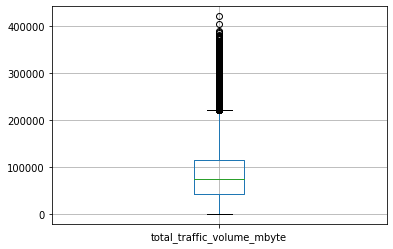

In [7]:
# Check outliar data
df.boxplot('total_traffic_volume_mbyte')

In [8]:
# Drop outliar data
Q1, Q3 = df['total_traffic_volume_mbyte'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df = df[(df['total_traffic_volume_mbyte'] > lower_limit) & (df['total_traffic_volume_mbyte'] < upper_limit)]
df.head(5)

,tanggal,regional,kabupaten,kecamatan,lac,ci,total_traffic_volume_mbyte,rw
0,20220201,JABOTABEK,KOTA DEPOK,Beji,133606,35,96950.470681,1
1,20220201,JABOTABEK,KOTA DEPOK,Beji,133606,34,102691.026483,1
2,20220201,JABOTABEK,KOTA DEPOK,Beji,133606,32,75333.733720,1
3,20220201,JABOTABEK,KOTA DEPOK,Beji,133606,31,183499.086676,1
4,20220201,JABOTABEK,KOTA DEPOK,Beji,133606,25,31582.665579,1


In [9]:
df.shape

(121743, 8)

In [10]:
# Average of payload usage in Depok
payload_depok = df["total_traffic_volume_mbyte"].mean()
payload_depok

79568.40188160495

In [11]:
# Name of kecamatan in each kecamatan in Depok
kec = df['kecamatan'].unique()
kec

array(['Beji', 'Cinere', 'Cimanggis', 'Sawangan', 'Sukma Jaya',
       'Cilodong', 'Pancoran Mas', 'Tapos', 'Limo', 'Cipayung',
       'Bojongsari'], dtype=object)

In [12]:
# Average of payload usage in Depok
payload_kec = []
for x in kec:
    kec2 = df.loc[df['kecamatan']== x]
    rata = kec2["total_traffic_volume_mbyte"].mean()
    payload_kec.append(rata)
payload_kec

[59405.72427613451,
 76305.28086825326,
 77892.54600972924,
 90387.27168309977,
 80264.20535597995,
 89821.65866232286,
 76823.68421170702,
 86486.93235910787,
 89036.58240776713,
 87046.63590713603,
 88976.16995647755]

In [13]:
# Create DataFrame from dict of list
df2 = pd.DataFrame(list(zip(kec, payload_kec)),
                  columns = ['kecamatan_payload', 'payload_MB'])
df2

,kecamatan_payload,payload_MB
0,Beji,59405.724276
1,Cinere,76305.280868
2,Cimanggis,77892.546010
3,Sawangan,90387.271683
4,Sukma Jaya,80264.205356
5,Cilodong,89821.658662
6,Pancoran Mas,76823.684212
7,Tapos,86486.932359
8,Limo,89036.582408
9,Cipayung,87046.635907


In [14]:
# Determine the recommended kecamatan for the development of 5G coverage in Depok
def recommendation(row):
    if row['payload_MB'] >= payload_depok:
        val = 'Yes'
    else:
        val = 'No'
    return val

df2['recommended_payload'] = df2.apply(recommendation, axis=1)
df2

,kecamatan_payload,payload_MB,recommended_payload
0,Beji,59405.724276,No
1,Cinere,76305.280868,No
2,Cimanggis,77892.546010,No
3,Sawangan,90387.271683,Yes
4,Sukma Jaya,80264.205356,Yes
5,Cilodong,89821.658662,Yes
6,Pancoran Mas,76823.684212,No
7,Tapos,86486.932359,Yes
8,Limo,89036.582408,Yes
9,Cipayung,87046.635907,Yes


In [15]:
# Sort recommendation results from largest to smallest value
df2.sort_values(by=['payload_MB'], inplace=True, ascending=False)
df2.insert(loc=0,column='no_payload', value = range(1, 1 + len(df2)))
df2

,no_payload,kecamatan_payload,payload_MB,recommended_payload
3,1,Sawangan,90387.271683,Yes
5,2,Cilodong,89821.658662,Yes
8,3,Limo,89036.582408,Yes
10,4,Bojongsari,88976.169956,Yes
9,5,Cipayung,87046.635907,Yes
7,6,Tapos,86486.932359,Yes
4,7,Sukma Jaya,80264.205356,Yes
2,8,Cimanggis,77892.546010,No
6,9,Pancoran Mas,76823.684212,No
1,10,Cinere,76305.280868,No


In [16]:
# Added 'time'column
time = str(df.iloc[0]['tanggal'])
df2.insert(loc=1,column='time', value = time[0:6])
df2

,no_payload,time,kecamatan_payload,payload_MB,recommended_payload
3,1,202202,Sawangan,90387.271683,Yes
5,2,202202,Cilodong,89821.658662,Yes
8,3,202202,Limo,89036.582408,Yes
10,4,202202,Bojongsari,88976.169956,Yes
9,5,202202,Cipayung,87046.635907,Yes
7,6,202202,Tapos,86486.932359,Yes
4,7,202202,Sukma Jaya,80264.205356,Yes
2,8,202202,Cimanggis,77892.546010,No
6,9,202202,Pancoran Mas,76823.684212,No
1,10,202202,Cinere,76305.280868,No


In [17]:
# Saving recommendation results to CSV file
df2.to_csv('summary_payload.csv', index=False)

In [18]:
# Threshold payload, save this value to the database
payload_depok

79568.40188160495